## Get data and store it as an dataframe for further processing steps

#### Read data and description from CSV file

In [1]:
# Import pandas library for processing dataframe
import pandas as pd

In [2]:
data = pd.read_csv('../input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Cleaning and pre-processing

In [3]:
# Null
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No null detected from this dataframe.

In [4]:
# Duplicate
data.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

In [5]:
# Remove duplicates and check again
data.drop_duplicates(inplace=True)
data.duplicated().value_counts()

False    12205
Name: count, dtype: int64

At this step, null and duplicated rows are cleaned.
We continue to work with data types.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

Examine categorical variables unique values:

In [7]:
print('Month values {}\n'.format(data['Month'].unique()))
print('OperatingSystems values {}\n'.format(data['OperatingSystems'].unique()))
print('Browser values {}\n'.format(data['Browser'].unique()))
print('Region values {}\n'.format(data['Region'].unique()))
print('TrafficType values {}\n'.format(data['TrafficType'].unique()))
print('Weekend values {}\n'.format(data['Weekend'].unique()))
print('Revenue values {}\n'.format(data['Revenue'].unique()))

Month values ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

OperatingSystems values [1 2 4 3 7 6 8 5]

Browser values [ 1  2  3  4  5  6  7 10  8  9 12 13 11]

Region values [1 9 2 3 4 5 6 7 8]

TrafficType values [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]

Weekend values [False  True]

Revenue values [False  True]



With Month, it is a collection of strings.
We can see that for OperatingSystems, Browser, Region, and TrafficType, these variables should be categorical ones, although they are displayed using numbers.
Weekend and Revenue are boolean variables with True and False.

To serve later purpose, boolean values should be converted to 0 for False and 1 for True.
The listed categorical as mentioned should be converted to the correct data type as well.

In [8]:
# fix the structure of the data
data['Revenue'] = data['Revenue'].replace({False: '0', True: '1'})
data['Weekend'] = data['Weekend'].replace({False: '0', True: '1'})

# convert to categorical data
month_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)
data['OperatingSystems'] = data['OperatingSystems'].astype('category')
data['Browser'] = data['Browser'].astype('category')
data['Region'] = data['Region'].astype('category')
data['TrafficType'] = data['TrafficType'].astype('category')
data['VisitorType'] = data['VisitorType'].astype('category')
data['Revenue'] = data['Revenue'].astype('category')
data['Weekend'] = data['Weekend'].astype('category')

# print the structure of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  Month                    12205 non-null  category
 11  OperatingSystems         12205 non-null  category
 12  Browser                  12205 non-null  category
 13  Region                   12205 non-null  category
 14  TrafficType

## Descriptive Analysis

In [9]:
# for numerical variables
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [10]:
# for categorical variables
data.describe(include='category')

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205,12205,12205,12205,12205,12205,12205,12205
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,0,0
freq,3329,6541,7883,4714,3911,10431,9346,10297


In [11]:
# frequency count for categorical variables
print(data['Revenue'].value_counts(), '\n')
print(data['Weekend'].value_counts(), '\n')
print(data['VisitorType'].value_counts(), '\n')
print(data['TrafficType'].value_counts(), '\n')
print(data['Region'].value_counts(), '\n')
print(data['Browser'].value_counts(), '\n')
print(data['OperatingSystems'].value_counts(), '\n')
print(data['Month'].value_counts())

Revenue
0    10297
1     1908
Name: count, dtype: int64 

Weekend
0    9346
1    2859
Name: count, dtype: int64 

VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64 

TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64 

Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: count, dtype: int64 

Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: count, dtype: int64 

OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: count, dtype: int64 

Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep  

### Import libraries for visualization purpose

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualize to view frequencies distribution between variables and Revenue

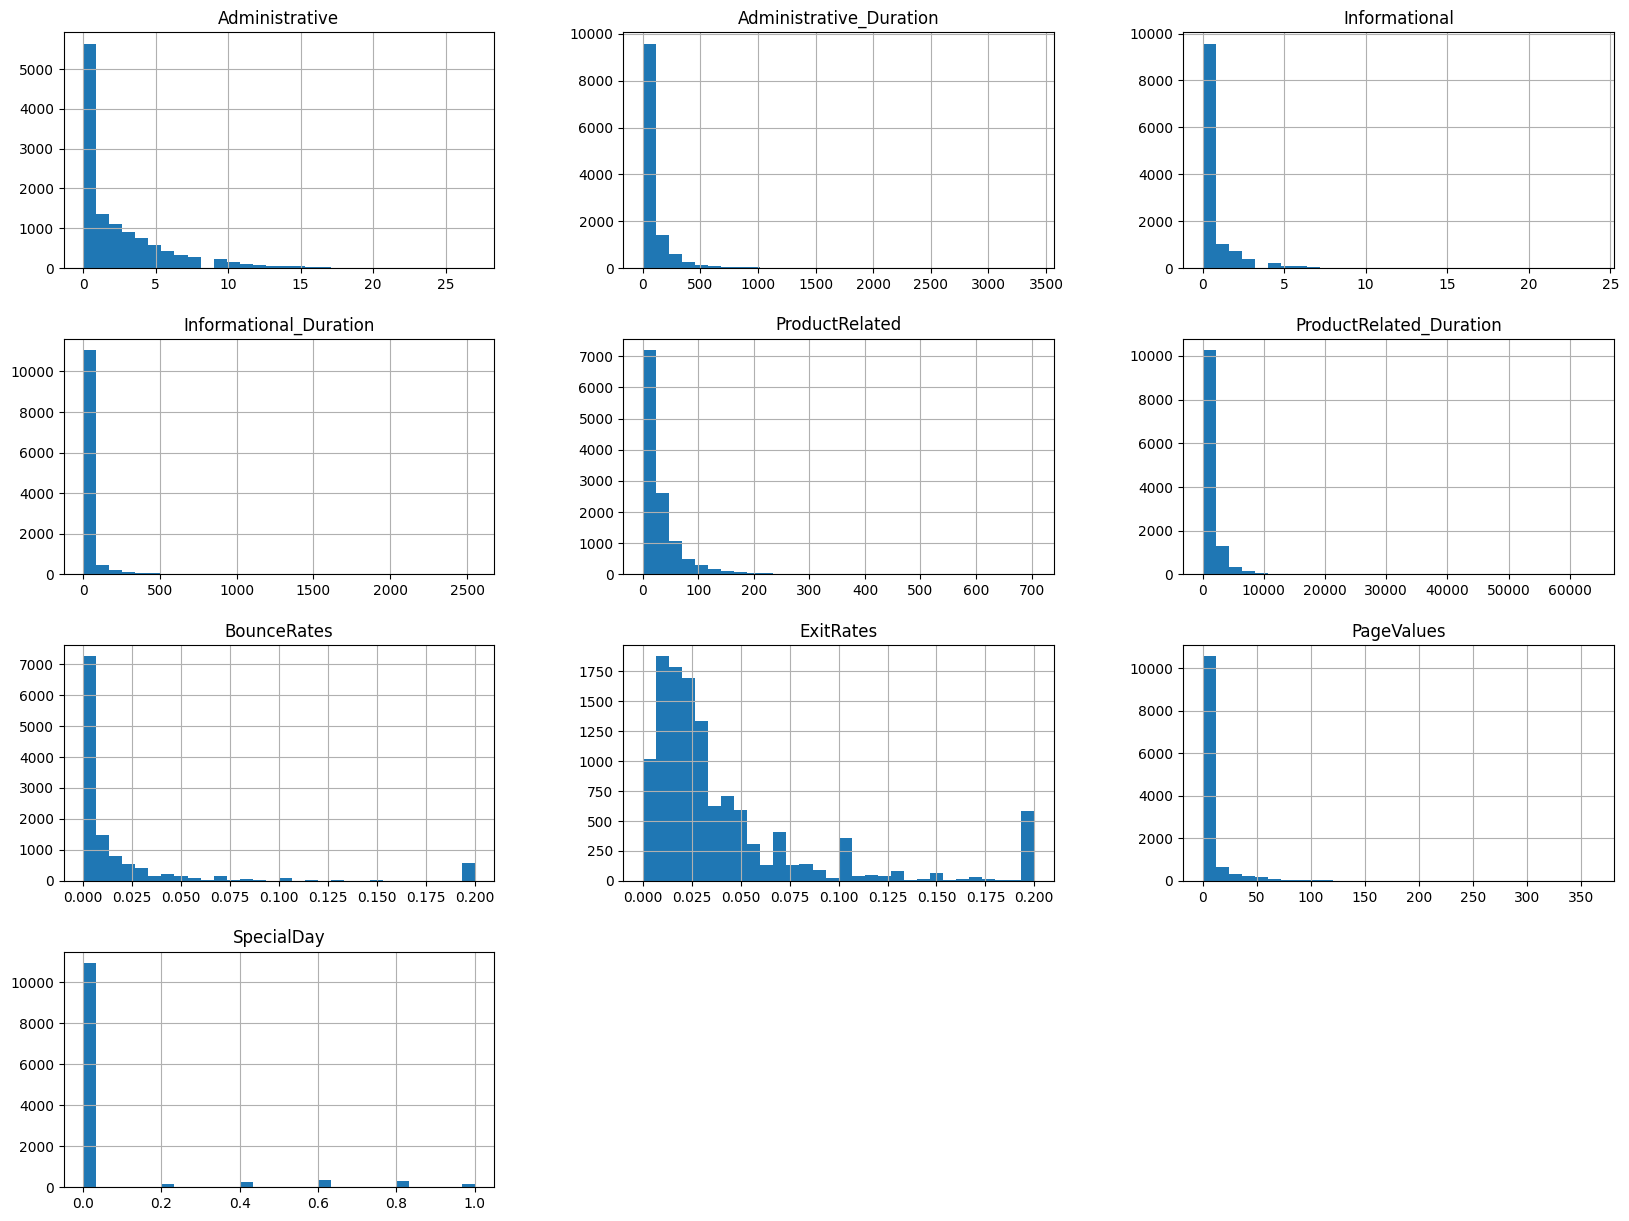

In [13]:
data.hist(bins=30, figsize=(20,15))
plt.show()

In [14]:
# Numerical & Categorical columns
num_cols = [var for var in data.select_dtypes(include=np.number)]
cat_cols = [var for var in data.select_dtypes(exclude=np.number)]

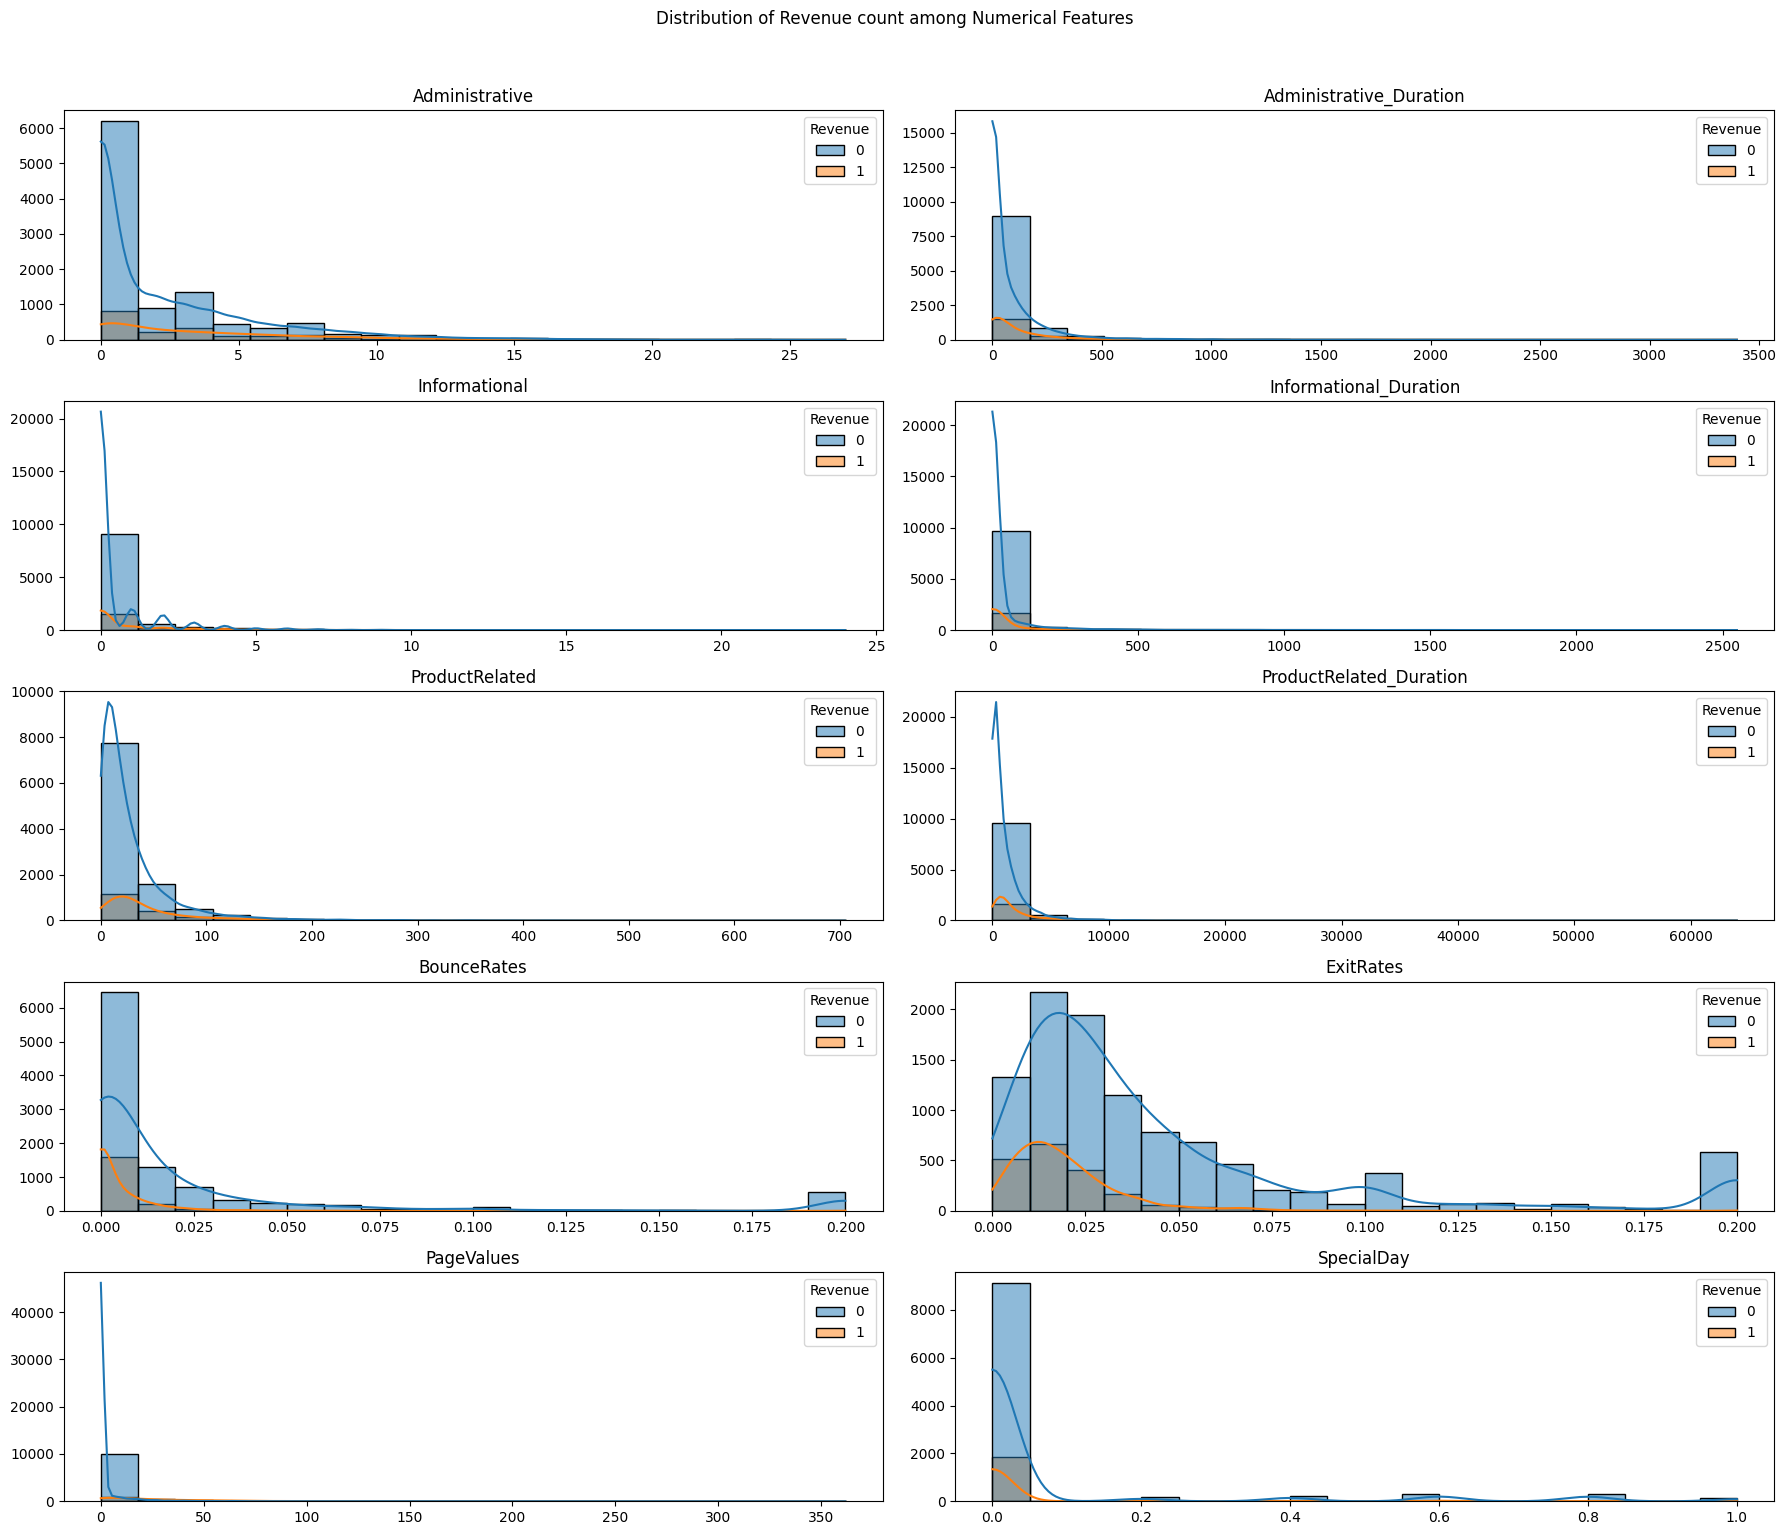

In [15]:
# Set up the layout for subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 15))
fig.suptitle('Distribution of Revenue count among Numerical Features', y=1.02)

# Plotting histograms for each numerical feature
for i, var in enumerate(num_cols):
    row, col = i // 2, i % 2
    sns.histplot(data, x=var, bins=20, kde=True, ax=axes[row, col], hue='Revenue')
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Remove empty subplots
for i in range(len(num_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

plt.show()

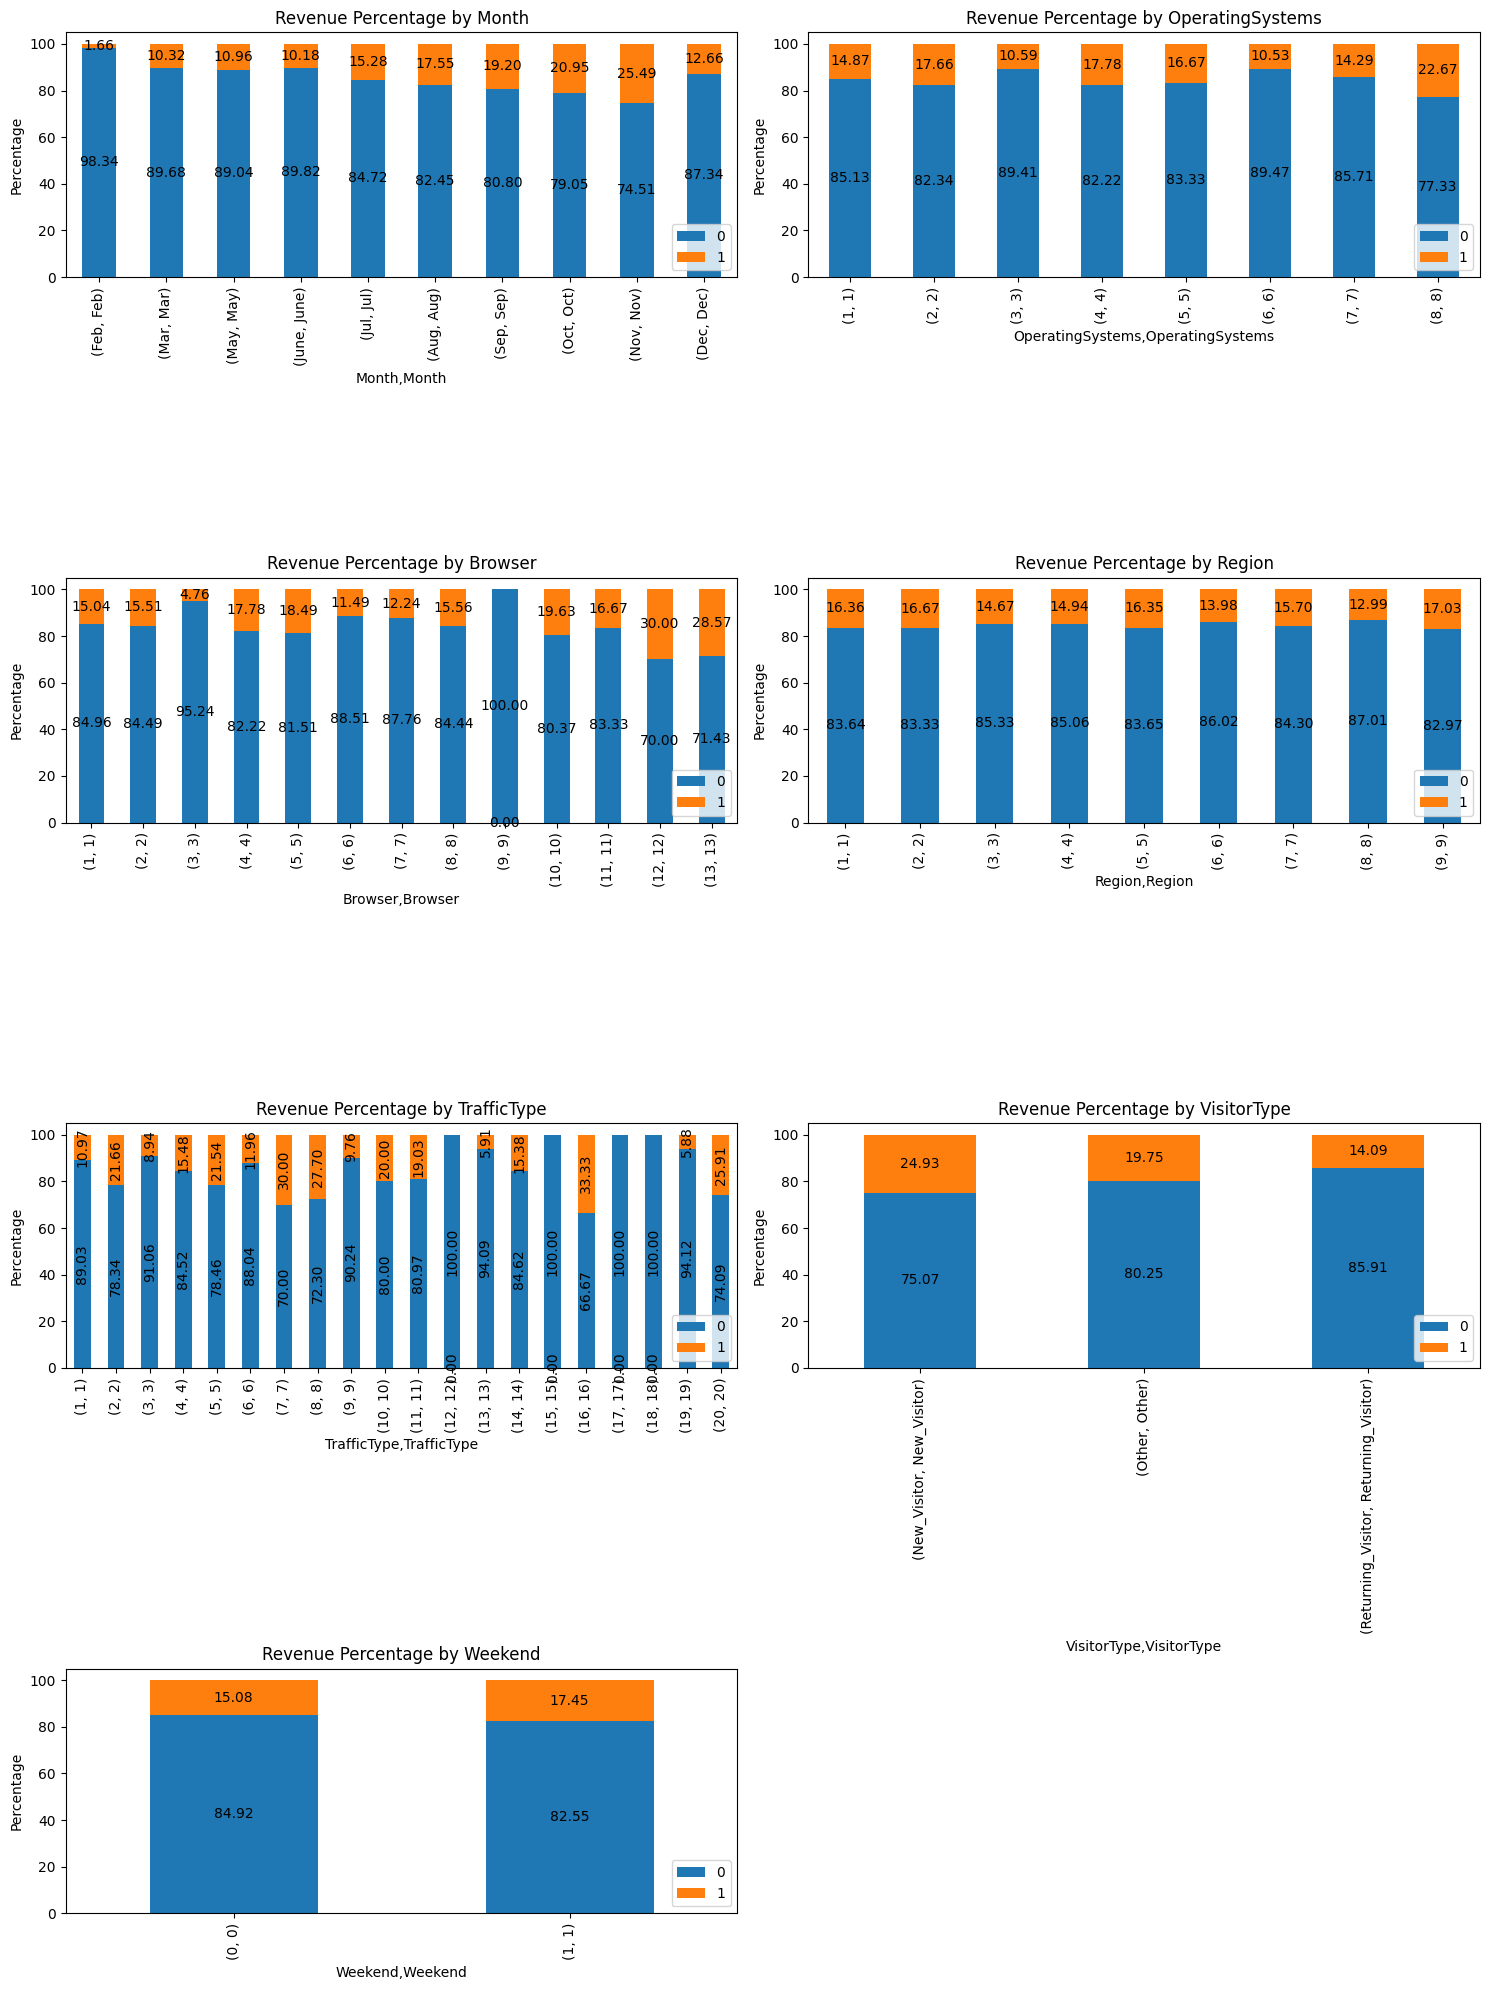

In [16]:
cat_cols.remove('Revenue')

# Calculate the number of rows and columns for the subplots
n = len(cat_cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5))

for i, col in enumerate(cat_cols):
    # Group by the categorical column and 'Revenue', then calculate the size of each group
    group_sizes = data.groupby([col, 'Revenue']).size()

    # Calculate the percentage of 'Revenue' for each category
    revenue_percent = group_sizes.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

    # Unstack the 'Revenue' level in the index to create 'True' and 'False' columns
    revenue_percent = revenue_percent.unstack('Revenue')

    # Plot the percentages in the subplot
    ax = axes[i // ncols, i % ncols]
    bars = revenue_percent.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Revenue Percentage by {col}')
    ax.set_ylabel('Percentage')

    # Add data labels
    for bar in bars.containers:
        rotation = 90 if col == 'TrafficType' else 0
        ax.bar_label(bar, label_type='center', fmt='%.2f', rotation=rotation)

    # Move the legend box to the bottom right corner
    ax.legend(loc='lower right')

# Remove empty subplots
if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Correlation heatmap

In [17]:
# Temporarily change categorical variables to numerical data type for correlation heatmap

from sklearn.preprocessing import LabelEncoder

df = data.copy()

# Convert boolean to integer
df['Weekend'] = df['Weekend'].astype(int)

# Create a label encoder object
le = LabelEncoder()

# Convert categorical variables to numerical
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['OperatingSystems'] = le.fit_transform(df['OperatingSystems'])
df['Browser'] = le.fit_transform(df['Browser'])
df['Region'] = le.fit_transform(df['Region'])
df['TrafficType'] = le.fit_transform(df['TrafficType'])

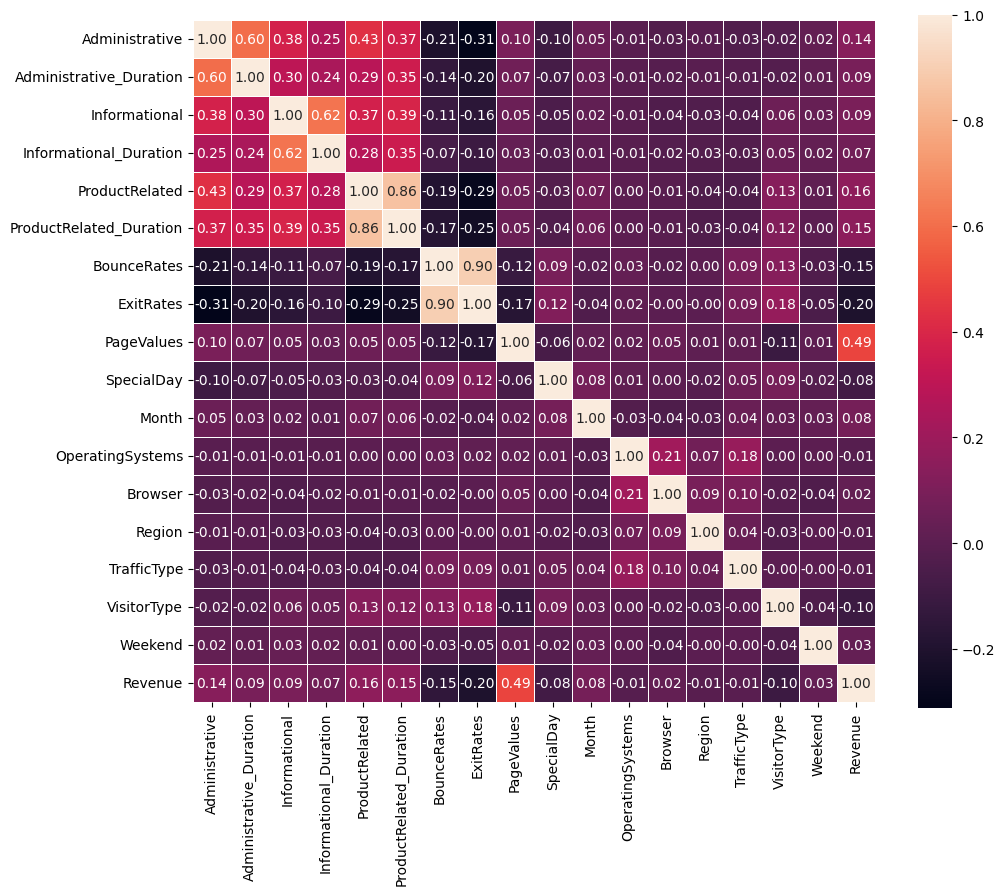

In [18]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt=".2f")

plt.show()

## Business Intelligence to define problems
(Bi-Variate analysis)

### Visitor types and Weekend with Revenue

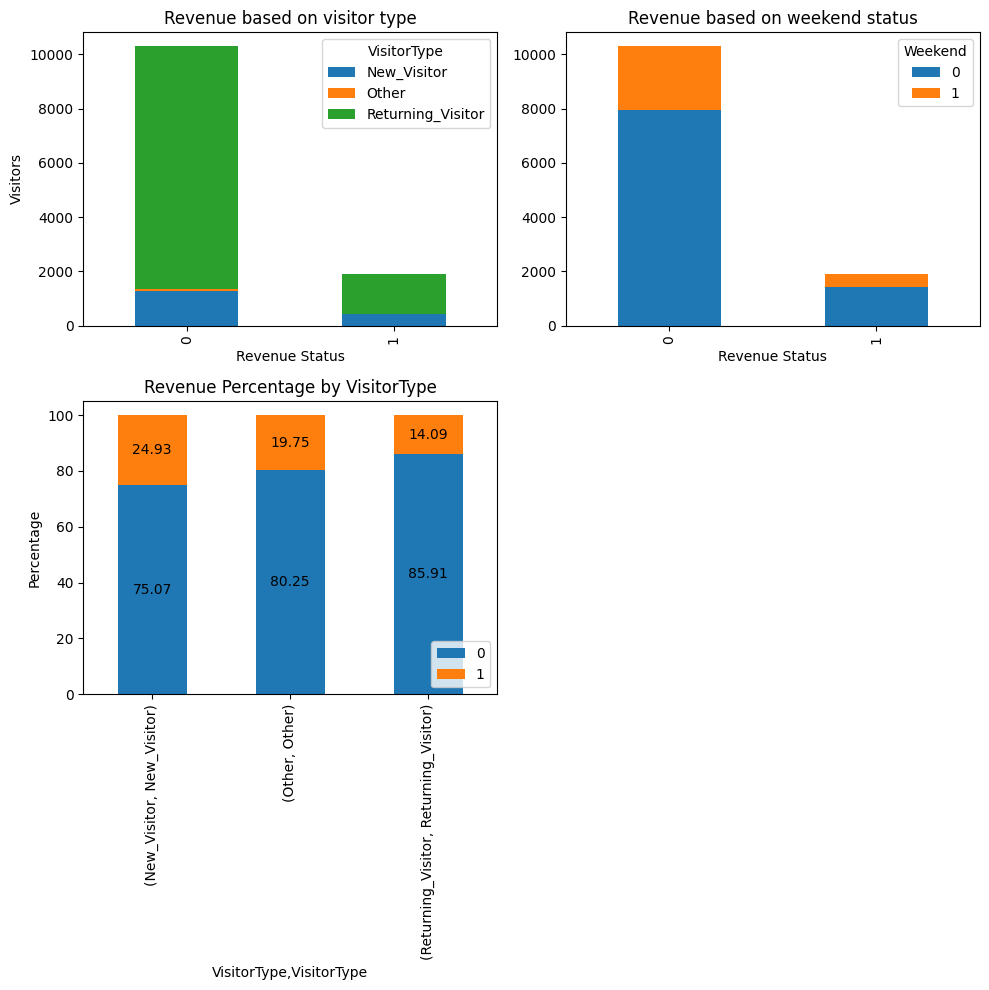

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the 2D numpy array of axes objects into a 1D array
axs = axs.ravel()

# chart 1
data.groupby(['VisitorType', 'Revenue']).size().unstack('VisitorType').plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Revenue based on visitor type')
axs[0].set_xlabel('Revenue Status')
axs[0].set_ylabel('Visitors')

# chart 2
data.groupby(['Weekend', 'Revenue']).size().unstack('Weekend').plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Revenue based on weekend status')
axs[1].set_xlabel('Revenue Status')

# chart 3
group_sizes = data.groupby(['VisitorType', 'Revenue']).size()
# Calculate the percentage of 'Revenue' for each category
revenue_percent = group_sizes.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
# Unstack the 'Revenue' level in the index to create 'True' and 'False' columns
revenue_percent = revenue_percent.unstack('Revenue')
bars = revenue_percent.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Revenue Percentage by VisitorType')
axs[2].set_ylabel('Percentage')
for rect in bars.containers:
    axs[2].bar_label(rect, label_type='center', fmt='%.2f')
# Move the legend box to the bottom right corner
axs[2].legend(loc='lower right')

# Remove the unused subplot
plt.delaxes(axs[3])

plt.tight_layout()
plt.show()

These figures indicates that the majority of visitors, **regardless of whether they generate revenue**, are Returning Visitor (ReturningVisitor accounts for the largest proportion in both Revenue=0 and Revenue=1 bars). This suggests that the company has been successful in retaining visitors. However, it's clear that there's room for improvement in conversion rates - **to convert these frequent visitors to buyers**.

Another notable pattern is that the group of **new visitors has higher purchase percentage than the returning** group. This supports the note above of taking care better to returning visitors to leverage and make more profit from this group.

**Most purchases were made during weekdays** (Weekend=0 part is larger in the Revenue=1 bar). This pattern could be leveraged to attract more visitors to visit and make purchases over the weekend.

**Recommendations:**
- Engage loyal customers (returning visitors) in conversion of other customers by offering discounts for inviting friends joining in. For new customers making a purchase in this manner, offer discounts as well. This might help strengthen the customer base (of returning visitors) and encourage more purchases from both groups.
- Introduce time based or weekend based marketing campaign and/or promotional events to engage customers more on the weekends

### Visitor type and Month with Revenue

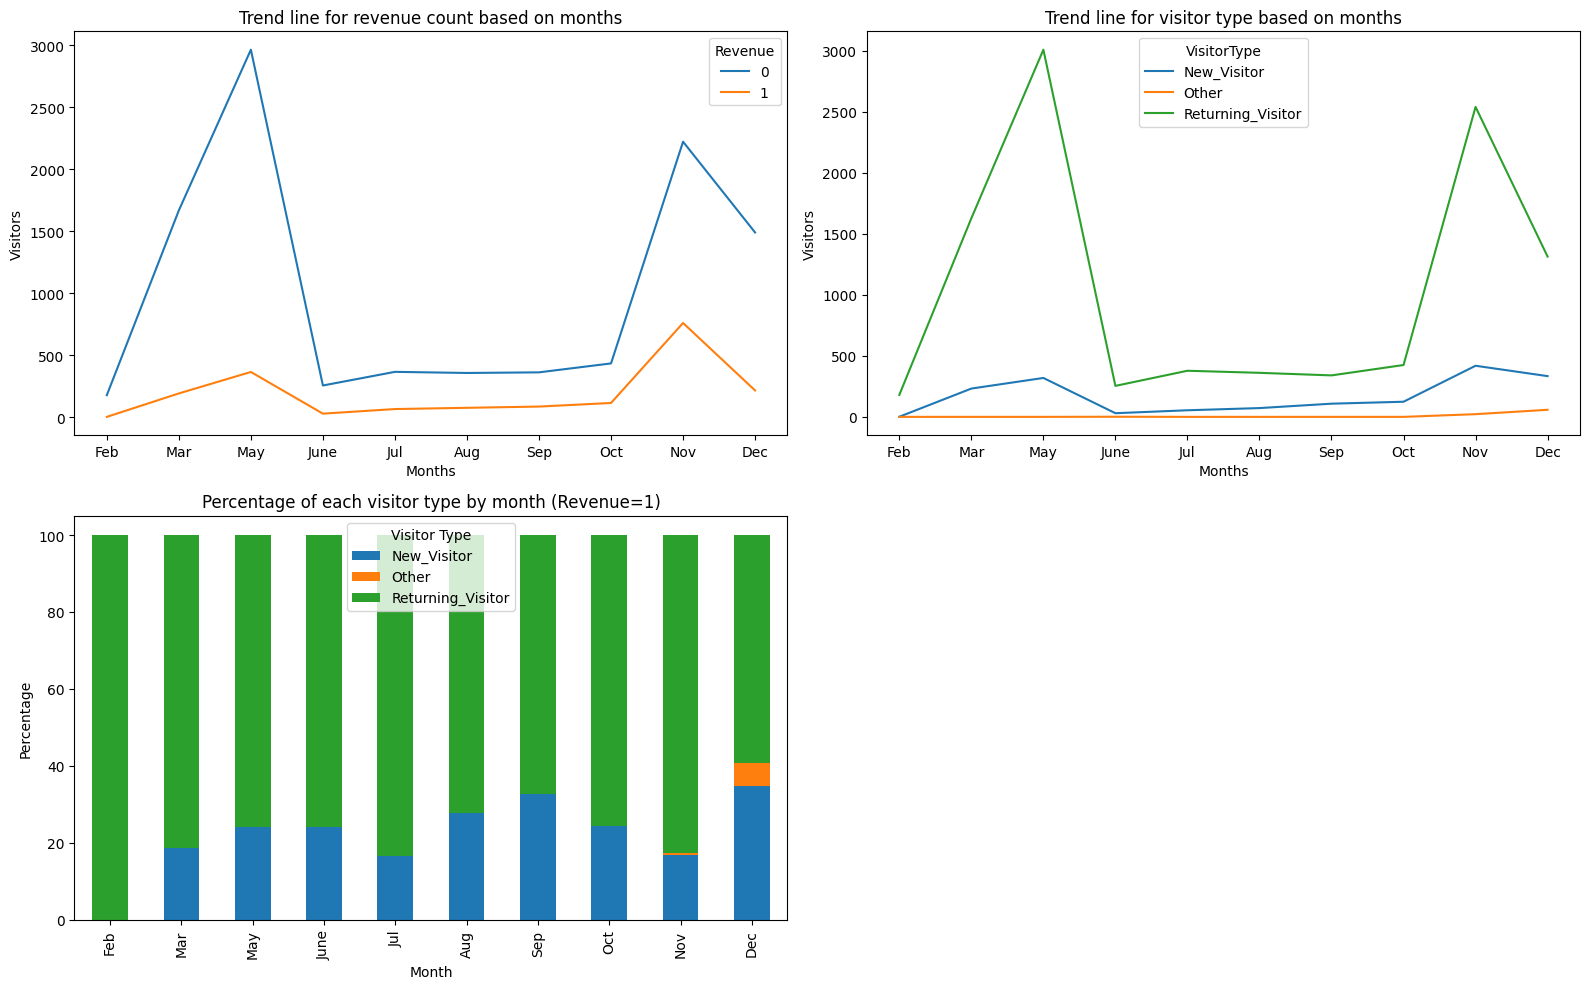

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Flatten the 2D numpy array of axes objects into a 1D array
axs = axs.ravel()

# Plot 1: Trend line for revenue status based on months
monthly_revenue = data.groupby(['Month', 'Revenue']).size().reset_index(name='Frequency')
sns.lineplot(data=monthly_revenue, x='Month', y='Frequency', hue='Revenue', ax=axs[0])
axs[0].set_title('Trend line for revenue count based on months')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Visitors')

# Plot 2: Trend line for visitor type based on months
monthly_visitors = data.groupby(['Month', 'VisitorType']).size().reset_index(name='Frequency')
sns.lineplot(data=monthly_visitors, x='Month', y='Frequency', hue='VisitorType', ax=axs[1])
axs[1].set_title('Trend line for visitor type based on months')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Visitors')

# Plot 3
# Filter data where Revenue=1
data_revenue = data[data['Revenue'] == '1']
# Group by 'Month' and 'VisitorType' and calculate the size
grouped = data_revenue.groupby(['Month', 'VisitorType']).size().reset_index(name='counts')

# Calculate the total counts for each 'Month'
month_totals = grouped.groupby('Month')['counts'].sum()

# Calculate the percentage
grouped['Percentage'] = grouped.apply(lambda row: 100 * row['counts'] / month_totals[row['Month']], axis=1)

# Pivot the data for the stacked bar chart
visitor_percentage_pivot = grouped.pivot(index='Month', columns='VisitorType', values='Percentage').fillna(0)
# Plot
visitor_percentage_pivot.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Percentage of each visitor type by month (Revenue=1)')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Percentage')
axs[2].legend(title='Visitor Type')

# Remove the unused subplot
fig.delaxes(axs[3])

plt.tight_layout()
plt.show()

The figure illustrates the cyclical nature of revenue growth.
Visitors engagement (access web pages) appears to peak during the months of February, March, and May, after which it begins to decline. From June to October, the trend seems to plateau, followed by a surge in engagement as Black Friday nears.

During periods of high demand (Feb, Mar, May), there is a significant amount of engagement, but conversion rates are notably lower since most purchases are made by returning customers (showed by the third plot).

**This implies that many visitors are browsing products in seasonal peaks, but not proceeding to make a purchase.**

**Recommendation:**
Introduction of seasonal promotions with attractive offers and events, engaging more conversions and ensuring loyal customers (returning visitors) have a beneficial part in bringing in new conversions (new visitors with purchases).

### Operating system (OS), browser, region, traffic type with Revenue

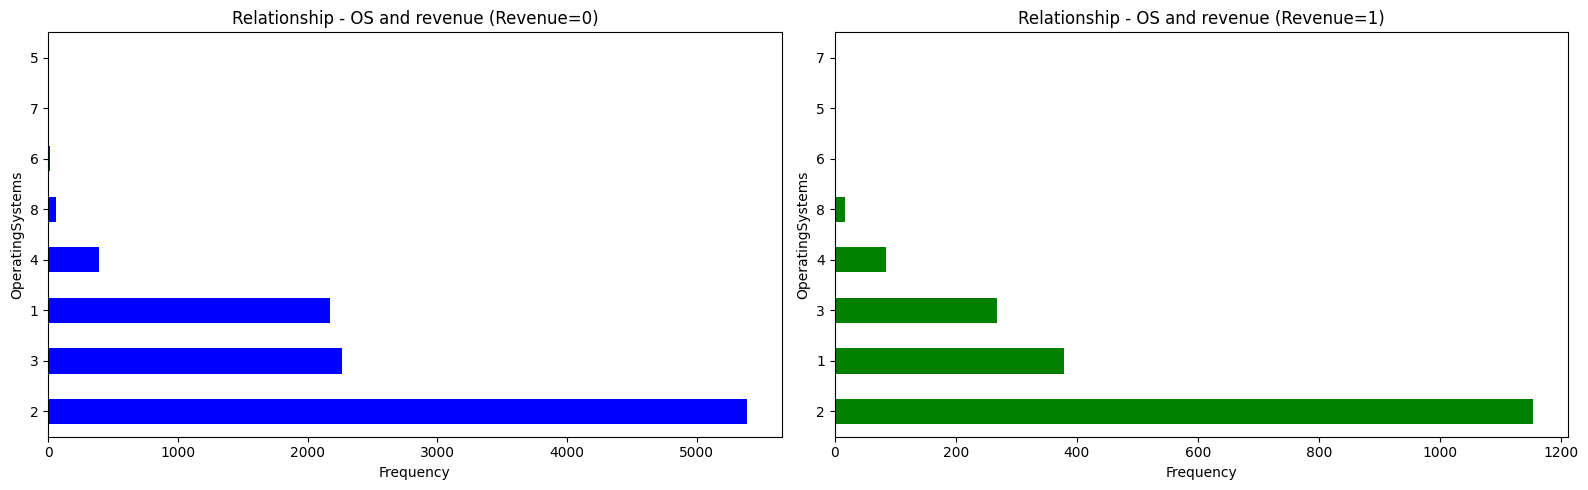

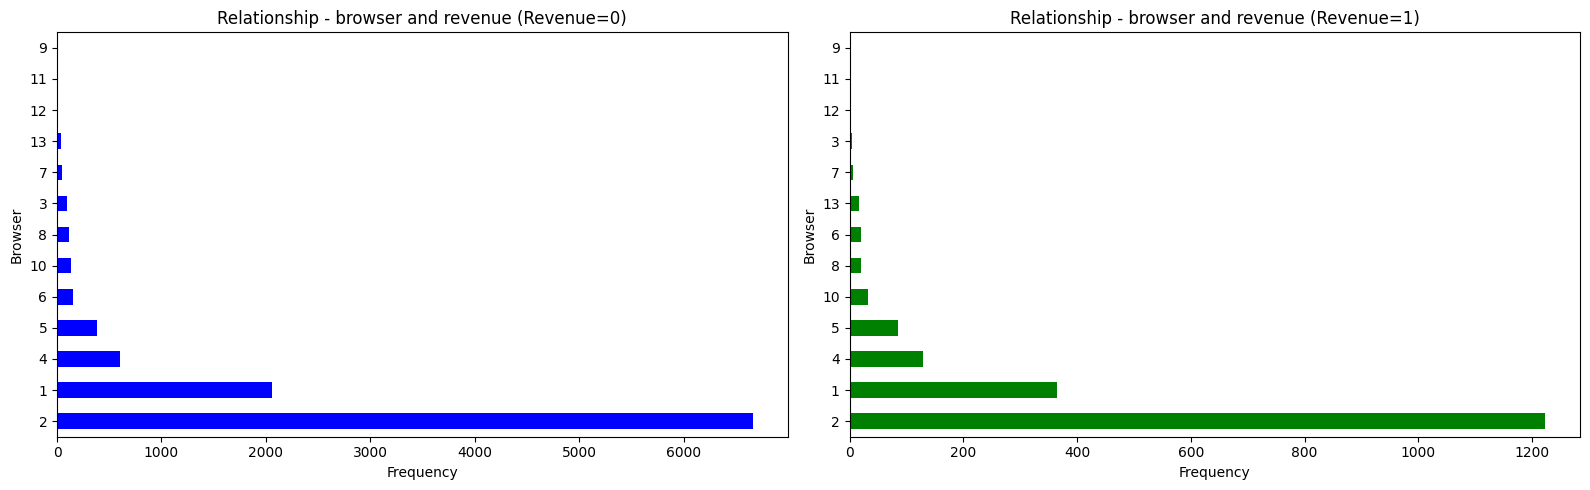

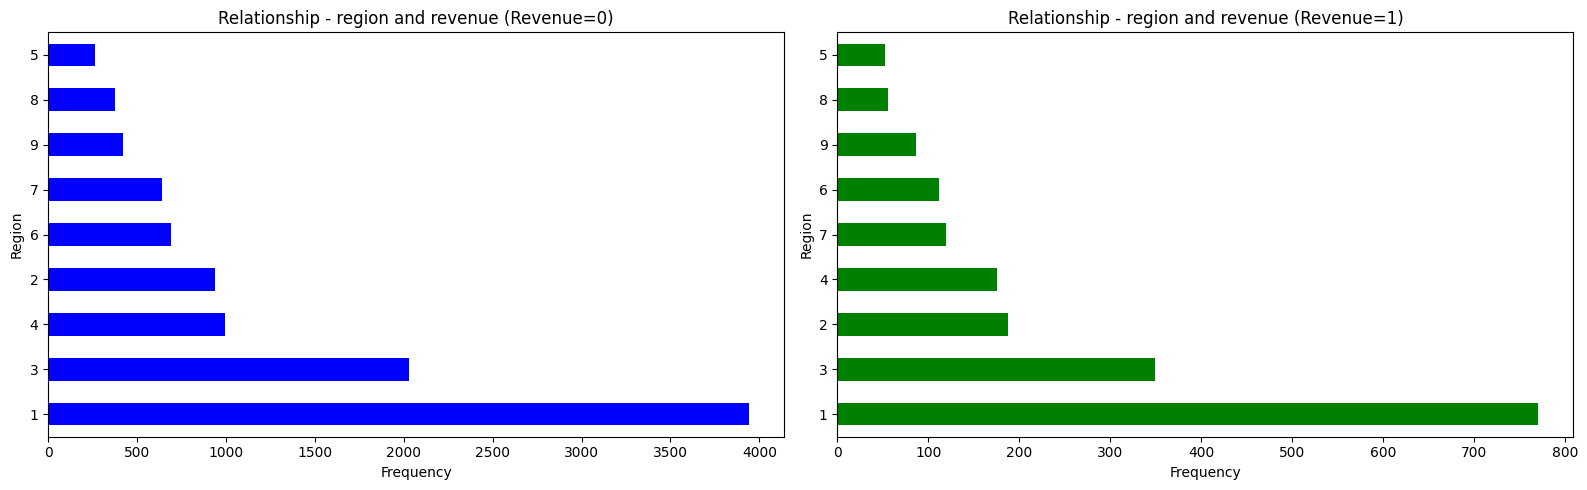

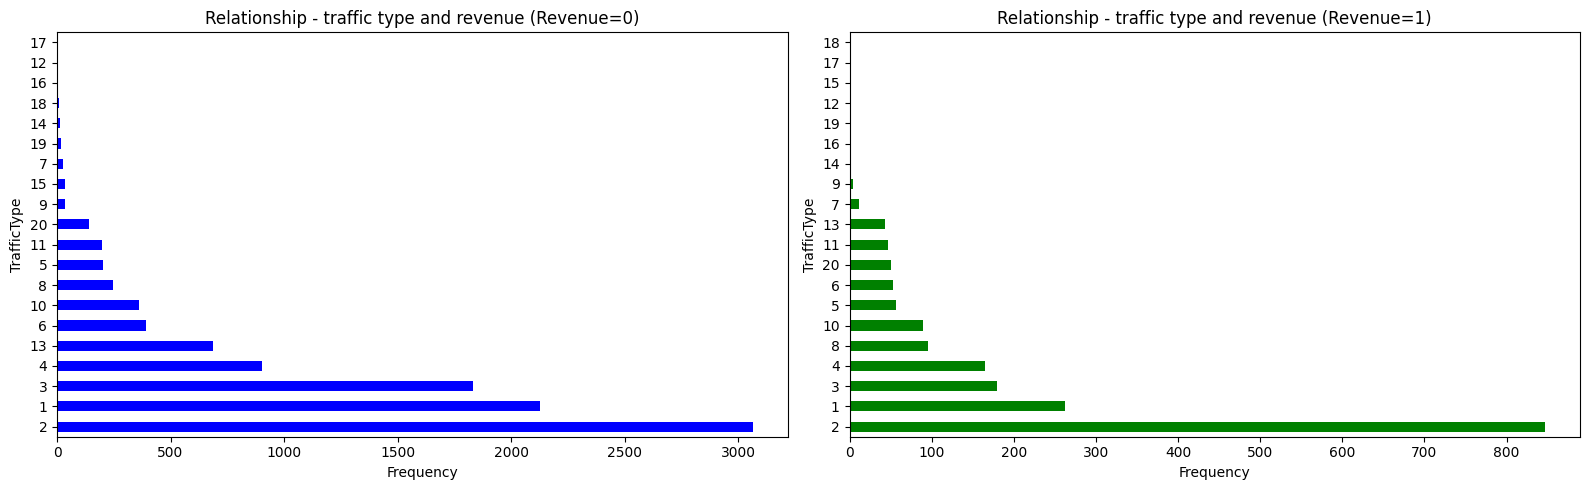

In [21]:
# Define a function to create the plots
def create_plot(data, column, title):
    # Filter data for Revenue=0 and Revenue=1
    data_0 = data[data['Revenue'] == '0']
    data_1 = data[data['Revenue'] == '1']

    # Calculate the frequency count
    freq_0 = data_0[column].value_counts().sort_values(ascending=False)
    freq_1 = data_1[column].value_counts().sort_values(ascending=False)

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    # Plot for Revenue=0
    freq_0.plot(kind='barh', color='blue', ax=axs[0])
    axs[0].set_title(title + ' (Revenue=0)')
    axs[0].set_xlabel('Frequency')
    axs[0].set_ylabel(column)

    # Plot for Revenue=1
    freq_1.plot(kind='barh', color='green', ax=axs[1])
    axs[1].set_title(title + ' (Revenue=1)')
    axs[1].set_xlabel('Frequency')
    axs[1].set_ylabel(column)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Relationship between OS and Revenue
create_plot(data, 'OperatingSystems', 'Relationship - OS and revenue')

# Relationship between Browser and Revenue
create_plot(data, 'Browser', 'Relationship - browser and revenue')

# Relationship between Region and Revenue
create_plot(data, 'Region', 'Relationship - region and revenue')

# Relationship between TrafficType and Revenue
create_plot(data, 'TrafficType', 'Relationship - traffic type and revenue')

The figure provides insights into the relationship between revenue growth and various factors such as the operating system, browser, region, and traffic sources.
- In terms of operating systems, "2" outperforms others in both visitor count and conversion rate. However, "1" and "3" follow in the rankings. The lower performance of other sources could indicate that the website may not be user-friendly on those platforms, or those platforms may be niche and not widely used by customers.
- When it comes to browsers, "2" tops the list followed by "1", "4", and "5" in both visitor count and conversion rate, suggesting similar reasoning as with operating systems.
- In terms of regions, "1" significantly outperforms others, followed by "3" in both visitor count and conversion rate. The substantial lead of "1" suggests effective marketing reach within this region. However, there is potential for improvement in other regions.
- Regarding traffic types, "2" leads the pack, followed by "1" and "3", indicating the influence of Google SEO optimization. However, with only 45% of these visits resulting in revenue, there is room for improvement in SEO and/or Google/Social media Ads. This data suggests a need for strategies that balance both visitor engagement and conversion rates.

**Recommendation:**
- Ensuring smooth technical operations with enhanced and personalized UI experience supported by all browsers and OS.
- Adapting similar model based approach as Region 1 over other regions by customizing the same according to social and cultural drivers. Personalizing ads and reach by A/B testing to ensure the reach and conversion / retention shows significant growth among all regions.
- Ensuring optimization of SEO from different sources such as Google, Bing, Baidu etc. Working with region and age specific A/B testing within Google Ads, Facebook Ads or other sources.

### Exit Rates and Bounce Rates

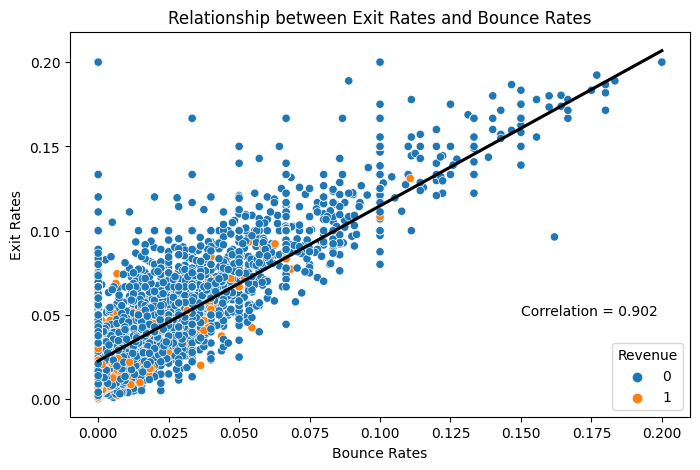

In [22]:
from scipy.stats import pearsonr

# Calculate the correlation
corr, _ = pearsonr(data['BounceRates'], data['ExitRates'])
corr = round(corr, 3)

# Create the plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=data)
sns.regplot(x='BounceRates', y='ExitRates', data=data, scatter=False, color='black')
plt.title('Relationship between Exit Rates and Bounce Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.text(0.15, 0.05, 'Correlation = ' + str(corr))
plt.show()

Bounce rate refers to the overall percentage of single engagement sessions, while exit rate pertains to the percentage of exits from a specific page. The former is calculated by dividing the total number of one-page visits by the total number of entrance visits, while the latter is calculated by dividing the total number of exits from a page by the total number of visits to that page. A key distinction between these two closely related metrics is that exit rate pertains to the overall percentage of visitors involved in the last session, while bounce rates account for the percentage of visitors involved in a single session. Therefore, in the case of bounce rate, prior activity is not taken into account. As a result, all bounces logically constitute exits, but the reverse is not necessarily true.

[A high bounce rate could signal issues with user satisfaction](https://contentsquare.com/blog/what-bounce-rate-says-about-your-customer-experience/) due to a variety of factors, such as an unfriendly website user interface, extremely slow throughput, or other technical issues. [A high exit rate could indicate underperforming areas in conversion funnels](https://www.americaneagle.com/insights/blog/post/2021/05/11/conversion-rate-optimization-understanding-your-exit-rate), highlighting areas ripe for optimization. If customers are leaving, then ultimately no purchases are being made. Assuming there is indeed no error in these 2 indexes, we could explore ways to optimize bounce rates and exit rates to ensure sales are saved and customer loyalty is secured.

Recommendation:
- Optimization of the landing product pages by means such as *making the add to cart option stand out, UI friendly, short descriptions and icons wherever needed, color impactfulness* and ensuring that the purchase experience is as smooth as possible.
- Ensure not to create an illusion of low price until put in the cart, i.e. the shipping fees could create a significant impact over exit rates. Hence it is always better to exhibit the true cost right from the start.
- Categorizing email retargeting based on funneling as mentioned so that there exists a personalized touch to the mail. Personalization brings in large scale loyalty and in turn better retention.
- Introducing pop-ups offering qualitative discounts or personalized queries when a customer bounces multiple times and/or tries to leave the website.

## Machine Learning models

### Prepare data for models

In [23]:
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('../input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
data = data.dropna()
data.drop_duplicates(inplace=True)

# Convert boolean to integer
data['Weekend'] = data['Weekend'].astype(int)

# Create a label encoder object
le = LabelEncoder()

# Convert categorical variables to numerical
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['OperatingSystems'] = le.fit_transform(data['OperatingSystems'])
data['Browser'] = le.fit_transform(data['Browser'])
data['Region'] = le.fit_transform(data['Region'])
data['TrafficType'] = le.fit_transform(data['TrafficType'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [24]:
# Set the random seed
random_seed = 1

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=random_seed, stratify=data['Revenue'])

Using scaled data we fed the dataset into a decision tree model considering all the attributes in place with the hope of significant feature importance in the model. Decision trees are a good classifier given their easy optimization techniques and feature importance clarifications.

This creates a StandardScaler object, which standardizes features by removing the mean and scaling to unit variance. Then it fits the scaler to the training data and transforms it. The transformed data has zero mean and unit variance.

In [26]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

sample_train = train.copy()
# Fit the scaler to the training data (numerical) and transform it
sample_train.iloc[:, 0:10] = scaler.fit_transform(sample_train.iloc[:, 0:10])

Apply SMOTE and RUS techniques to deal with imbalanced dataset.

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the SMOTE object
smote = SMOTE(sampling_strategy=0.5, random_state=random_seed)

# Define the random undersampling object
rus = RandomUnderSampler(sampling_strategy=1, random_state=random_seed)

# Create a pipeline that combines SMOTE and RUS
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus)])

# Apply the pipeline to the training data
X_train, y_train = pipeline.fit_resample(sample_train.drop('Revenue', axis=1), sample_train['Revenue'])

### Model: Decision Tree
(with Cost-Sensitive Learning parameter)

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the decision tree model classifier with adjusted weights of classes - inversely proportional to the frequencies
model_DT = DecisionTreeClassifier(class_weight='balanced', random_state=random_seed)

# Fit the model to the SMOTE and RUS-augmented data
model_DT.fit(X_train, y_train)

# Print the features' importance score
importance = pd.DataFrame({'feature': X_train.columns, 'importance': model_DT.feature_importances_})
print(importance.sort_values('importance', ascending=False))

                    feature  importance
8                PageValues    0.605314
10                    Month    0.053513
5   ProductRelated_Duration    0.046357
1   Administrative_Duration    0.042364
7                 ExitRates    0.039823
4            ProductRelated    0.038955
0            Administrative    0.030941
6               BounceRates    0.029160
13                   Region    0.021815
14              TrafficType    0.021538
3    Informational_Duration    0.016625
12                  Browser    0.015748
2             Informational    0.011421
11         OperatingSystems    0.008915
15              VisitorType    0.008440
16                  Weekend    0.007204
9                SpecialDay    0.001867


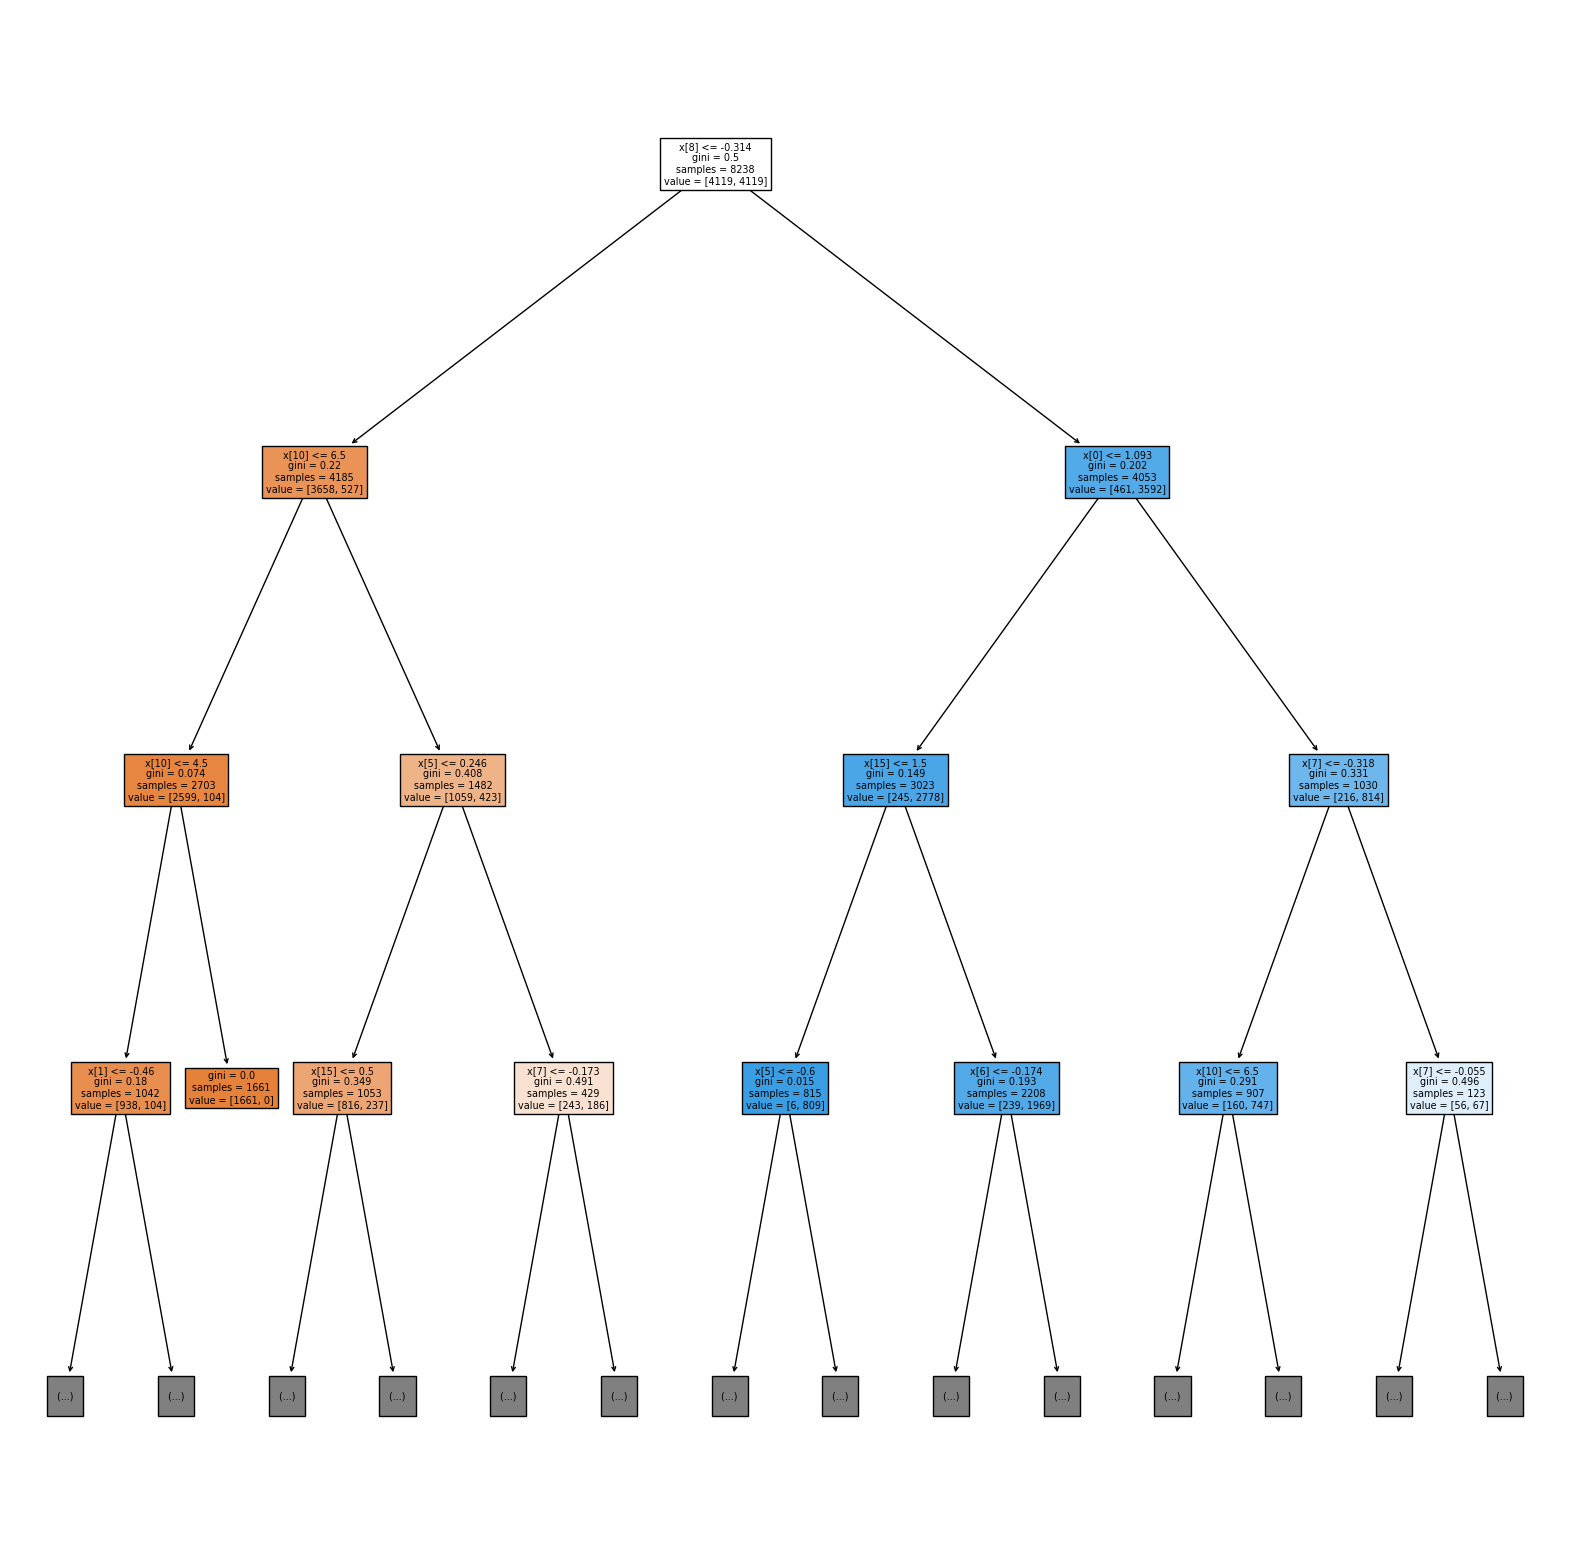

In [29]:
# Plot the first few layers of the decision tree
plt.figure(figsize=(20, 20))  # Increase the figure size
plot_tree(model_DT, filled=True, max_depth=3)  # Limit the depth of the tree
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Define a function to calculate the metrics
def metrics(y_true, y_pred):
    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate the metrics
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    tpr_recall = recall_score(y_true, y_pred)
    fpr = fp / (fp + tn)
    tnr_specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)

    # Print the metrics
    print(f"Accuracy = {accuracy}")
    print(f"Error Rate = {error_rate}")
    print(f"True Positive Rate (Recall) = {tpr_recall}")
    print(f"False Positive Rate = {fpr}")
    print(f"True Negative Rate (Specificity) = {tnr_specificity}")
    print(f"Precision = {precision}")
    print(f"F1Score = {f1score}")

In [31]:
# Predict the test set results
y_pred = model_DT.predict(test.drop('Revenue', axis=1))

# Print the fitness level
print("Model: Decision Tree Classifier")
print("Fitness level")
print(accuracy_score(test['Revenue'], y_pred))

# Evaluate on the test set
print("\nEvaluation on test set")
metrics(test['Revenue'], y_pred)

Model: Decision Tree Classifier
Fitness level
0.6198279393691111

Evaluation on test set
Accuracy = 0.6198279393691111
Error Rate = 0.38017206063088893
True Positive Rate (Recall) = 0.7303664921465969
False Positive Rate = 0.40067994171928123
True Negative Rate (Specificity) = 0.5993200582807188
Precision = 0.25271739130434784
F1Score = 0.3755047106325707


The decision tree visualization provides insights into the most significant attributes contributing to the information output. According to the feature importance table, `PageValues` tops the list, followed by `Month`, `ProductRelatedDuration`, `AdministrativeDuration`, `ExitRates`, `ProductRelated`, `Administrative`, and `BounceRates`. These attributes align with previous recommendations due to their importance as revenue drivers.

The model's fitness level was at 62%, but the F1 Score was at 37%, suggesting that the model is not performing well on the minority class. In other words, this model might be predicting the majority class well (which contributes to a higher accuracy - Revenue=False), but it’s not predicting the minority class well (which results in a lower F1 score - Revenue=True). This is due to the imbalance dataset that has class Revenue=False significantly outnumbers the class Revenue=True.

**Synthetic Minority Over-sampling Technique (SMOTE)**, **Random Under Sampling (RUS)**, and **Cost-Sensitive Learning** were applied to deal with the imbalanced dataset but the outcome is still poor. This suggests some more recommended actions, which are:
- Tune Resampling Strategy: More experiment with different ratios in SMOTE and RUS or try other resampling techniques.
- Model Tuning: Consider tuning the hyperparameters of the Decision Tree model or try other algorithms that might be more robust to class imbalance.
- Feature Engineering: Investigate the possibility of engineering new features or selecting a more informative subset of features.
- Ensemble Methods: Improve performance by combining the predictions of multiple models1.

**Recommendation:**
The significant impact on `PageValue` suggests that customers consider a variety of different products and their recommendations. Therefore, improving recommendation engines and bundle packages could lead to more conversions. Including more products to exploit the long tail effect in e-commerce will also bring in more revenue drivers. This approach could help enhance visitors engagement and ultimately boost sales.

## Interpretation from the analysis process and result of decision tree model

(ranked based on importance score from the Decision Tree model's result)

1. **Leverage Recommendation Engines**: Utilize recommendation engines to personalize the customer experience and promote "long tail" products that cater to niche markets.

2. **Seasonal Promotions and Discounts**: Implement timely promotions and discounts during peak seasons to boost sales and customer engagement.

3. **Time-Based Promotions**: Launch weekend or time-specific promotions and discounts to incentivize purchases during off-peak hours.

4. **SEO and Social Media Advertising**: Enhance visibility through Search Engine Optimization (SEO) and strategically placed advertisements on social media platforms.

5. **Landing Page Optimization**: Improve the design and content of landing pages to increase conversion rates and enhance user experience.

6. **Technical Operations and User Interface**: Ensure smooth technical operations and develop a user-friendly interface to provide a seamless user experience.

7. **Newcomer and Referral Discounts**: Offer special discounts for first-time customers and rewards for existing customers who refer new customers, fostering a loyal customer base.

8. **Region-Specific A/B Testing and Market Reach**: Conduct region-based A/B testing to understand customer preferences and expand market reach.

9. **Personalized Email Retargeting**: Implement personalized email retargeting strategies to re-engage customers who have shown interest in our products.

10. **Exit Rate Strategy with Personalized Pop-ups**: Develop an exit rate strategy that includes personalized pop-ups to retain customers who are about to leave the website.

By implementing these strategies in the order of priority, we aim to maximize customer engagement, increase sales, and enhance the overall customer experience.